In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time
from datetime import date

In [2]:
train_2016=pd.read_csv('/Users/xuchang/Dropbox/SIT/stevens fall 2017/BIA 686/assignment 2/train_2016_v2.csv')
train_2016.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [3]:
#check missing value
logerror=pd.DataFrame(train_2016['logerror'])
logerror.isnull().any()

logerror    False
dtype: bool

In [4]:
# statistical overview of target variable
logerror.describe()

,logerror
count,90275.000000
mean,0.011457
std,0.161079
min,-4.605000
25%,-0.025300
50%,0.006000
75%,0.039200
max,4.737000


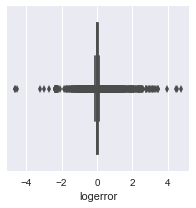

In [5]:
#box plot
box=sns.FacetGrid(logerror)
box.map(sns.boxplot,'logerror')

Outliers exist in two tails.

In [6]:
#using IQR method deal with outliers
q1,q2,q3 = np.percentile(logerror,(25,50,75))
IQR=q3-q1
low=q1-1.5*IQR
high=q3+1.5*IQR
print('If logerror value beyonds '+str(low)+' to '+str(high)+', it is an outlier.')

If logerror value beyonds -0.12205 to 0.13595, it is an outlier.


In [7]:
logerror=list(train_2016['logerror'])

In [8]:
#remove outliers
logerror=[x for x in logerror if low<x<high]
logerror

[0.0276,
 -0.0040000000000000001,
 0.0218,
 -0.0050000000000000001,
 0.044000000000000004,
 -0.0030000000000000001,
 0.0843,
 -0.0161,
 0.0344,
 0.081600000000000006,
 -0.044999999999999998,
 0.002,
 0.044000000000000004,
 -0.0419,
 -0.002,
 0.01,
 -0.038699999999999998,
 0.0218,
 0.0149,
 0.11509999999999999,
 -0.044000000000000004,
 -0.074700000000000003,
 0.0080000000000000002,
 0.001,
 -0.053400000000000003,
 -0.039800000000000002,
 -0.029399999999999999,
 0.020799999999999999,
 -0.023300000000000001,
 0.026599999999999999,
 -0.022200000000000001,
 -0.027400000000000001,
 -0.001,
 0.052600000000000001,
 -0.048099999999999997,
 0.041099999999999998,
 0.023699999999999999,
 -0.0060000000000000001,
 0.041099999999999998,
 -0.090999999999999998,
 0.044999999999999998,
 0.0402,
 0.044999999999999998,
 -0.036700000000000003,
 -0.040800000000000003,
 0.015900000000000001,
 0.0060000000000000001,
 -0.017100000000000001,
 0.0344,
 0.063899999999999998,
 0.063899999999999998,
 0.057299999999

In [9]:
logerror=pd.DataFrame(logerror)
logerror.describe()

,0
count,79697.000000
mean,0.005587
std,0.046684
min,-0.121000
25%,-0.021200
50%,0.005000
75%,0.032500
max,0.135400


In [10]:
logerror.isnull().any()

0    False
dtype: bool

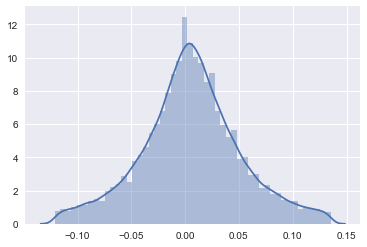

In [11]:
#histogram
sns.distplot(logerror,hist=True)

It looks like that Logerror follows normal distribution.

In [12]:
#parcelid
parcelid=train_2016['parcelid']
parcelid=parcelid.value_counts().reset_index()
parcelid.head()

,index,parcelid
0,11842707,3
1,12613442,2
2,12032773,2
3,11729067,2
4,11845988,2


In [13]:
parcelid['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

This result shows that only one paicel id was used for 3 times, the majority ids were used for only once.

In [14]:
#transaction date
transaction_date=pd.to_datetime(train_2016['transactiondate'])
month=transaction_date.dt.month
month.head()

0    1
1    1
2    1
3    1
4    1
Name: transactiondate, dtype: int64

In [15]:
month_freq=month.value_counts()
month_freq

6     10922
8     10476
5      9961
7      9947
9      9575
4      9311
3      8652
1      6556
2      6333
10     4977
11     1826
12     1739
Name: transactiondate, dtype: int64

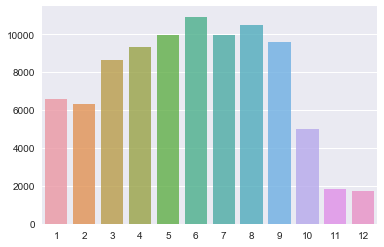

In [16]:
sns.barplot(month_freq.index, month_freq.values, alpha=0.8)

1. According to the data description, we have  all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016, which make sense that the transaction numbers are kind of low from October to December. 
2. Ans from this figure, transaction numbers increased from start of this year and reached the highest in June, then kept in a stable transaction amount.
3. Because we don't have all transaction data from October, so we can't get the transaction trend adter September.

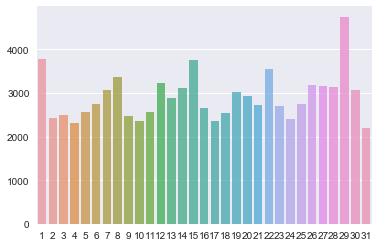

In [17]:
day=transaction_date.dt.day
day_freq=day.value_counts()
sns.barplot(day_freq.index,day_freq.values,alpha=0.8)

Seen from this figure, day is not a significant factor that affects transaction amount.

In [18]:
properties_2016=pd.read_csv('/Users/xuchang/Dropbox/SIT/stevens fall 2017/BIA 686/assignment 2/properties_2016.csv')
properties_2016.head()

/Users/xuchang/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [19]:
properties_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [20]:
#check missing value
properties_2016.isnull().any()

parcelid                        False
airconditioningtypeid            True
architecturalstyletypeid         True
basementsqft                     True
bathroomcnt                      True
bedroomcnt                       True
buildingclasstypeid              True
buildingqualitytypeid            True
calculatedbathnbr                True
decktypeid                       True
finishedfloor1squarefeet         True
calculatedfinishedsquarefeet     True
finishedsquarefeet12             True
finishedsquarefeet13             True
finishedsquarefeet15             True
finishedsquarefeet50             True
finishedsquarefeet6              True
fips                             True
fireplacecnt                     True
fullbathcnt                      True
garagecarcnt                     True
garagetotalsqft                  True
hashottuborspa                   True
heatingorsystemtypeid            True
latitude                         True
longitude                        True
lotsizesquar

In [21]:
properties_16=(properties_2016.isnull().sum()).reset_index()
properties_16.columns=('features','missing_freq')
properties_16

,features,missing_freq
0,parcelid,0
1,airconditioningtypeid,2173698
2,architecturalstyletypeid,2979156
3,basementsqft,2983589
4,bathroomcnt,11462
5,bedroomcnt,11450
6,buildingclasstypeid,2972588
7,buildingqualitytypeid,1046729
8,calculatedbathnbr,128912
9,decktypeid,2968121


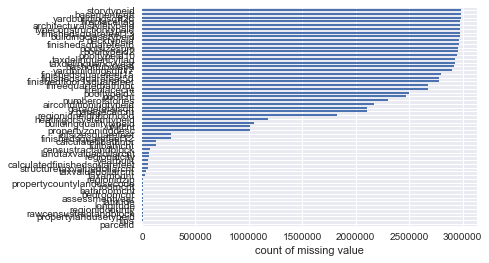

In [22]:
(properties_2016.isnull().sum()).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('count of missing value')
plt.show()

In [23]:
#merge train data and 2016 properties data
train=pd.merge(train_2016,properties_2016,on='parcelid',how='left')
train_x=train.drop(['parcelid','logerror'],axis=1,inplace=False)
train.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [24]:
train_tp=train_x.dtypes.reset_index()
train_tp.columns = ["feature","type"]
train_tp

,feature,type
0,transactiondate,object
1,airconditioningtypeid,float64
2,architecturalstyletypeid,float64
3,basementsqft,float64
4,bathroomcnt,float64
5,bedroomcnt,float64
6,buildingclasstypeid,float64
7,buildingqualitytypeid,float64
8,calculatedbathnbr,float64
9,decktypeid,float64


In [25]:
train_tp['type'].value_counts()

float64    52
object      6
Name: type, dtype: int64

After we remove target(logerror) and parcelid, most od the variables are float, only 6 of them are object, meaning categorical.

In [26]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 58 columns):
transactiondate                 90275 non-null object
airconditioningtypeid           28781 non-null float64
architecturalstyletypeid        261 non-null float64
basementsqft                    43 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
decktypeid                      658 non-null float64
finishedfloor1squarefeet        6856 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
finishedsquarefeet13            33 non-null float64
finishedsquarefeet15            3564 non-null float64
finishedsquarefeet50            6856 non-null float64
finishedsquarefeet6         

In [27]:
train_x.isnull().sum().sort_values(ascending=False)

buildingclasstypeid             90259
finishedsquarefeet13            90242
storytypeid                     90232
basementsqft                    90232
yardbuildingsqft26              90180
fireplaceflag                   90053
architecturalstyletypeid        90014
typeconstructiontypeid          89976
finishedsquarefeet6             89854
decktypeid                      89617
poolsizesum                     89306
pooltypeid10                    89114
pooltypeid2                     89071
taxdelinquencyyear              88492
taxdelinquencyflag              88492
hashottuborspa                  87910
yardbuildingsqft17              87629
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedfloor1squarefeet        83419
fireplacecnt                    80668
threequarterbathnbr             78266
pooltypeid7                     73578
poolcnt                         72374
numberofstories                 69705
airconditioningtypeid           61494
garagetotals

For total 90725 rows, some of the features have over 90000 missing value, so we may consider remove these variables.

calculatedfinishedsquarefeet is almost complete, so we keep this one and use mean to replace missing value. But for other finishedsquarefeet, we consider removing them, because they are redundant.

In [28]:
percentage=train_x['finishedsquarefeet6'].isnull().sum()/90725*100

In [29]:
print('The features: buildingclasstypeid, finishedsquarefeet13, storytypeid,basementsqft, yardbuildingsqft26, fireplaceflag, architecturalstyletypeid, typeconstructiontypeid, finishedsquarefeet6 counts more than '+ str(percentage)+ 'percent minsing values.')

The features: buildingclasstypeid, finishedsquarefeet13, storytypeid,basementsqft, yardbuildingsqft26, fireplaceflag, architecturalstyletypeid, typeconstructiontypeid, finishedsquarefeet6 counts more than 99.0399559107percent minsing values.


1. Because the features: fips, assessmentyear, bathroomcnt, bedroomcnt, roomcnt, latitude, regionidcounty, rawcensustractandblock, propertylandusetypeid, longitude, transactiondate, have no missing value, so we'll conduct further steps to check their relationships with target: logerror.
2. As mentioned before, the features have over 99% missing value, we consider removing them.

In [30]:
train_x2=train_x.drop(['finishedsquarefeet12','finishedsquarefeet6','finishedsquarefeet13','finishedsquarefeet15','finishedsquarefeet50','finishedfloor1squarefeet','storytypeid','basementsqft','yardbuildingsqft26','fireplaceflag','architecturalstyletypeid','typeconstructiontypeid','decktypeid','yardbuildingsqft17','censustractandblock','pooltypeid2','pooltypeid10','poolcnt','structuretaxvaluedollarcnt','assessmentyear','transactiondate','calculatedbathnbr','fullbathcnt'],axis=1)

In [31]:
train_x2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 35 columns):
airconditioningtypeid           28781 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingclasstypeid             16 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
fips                            90275 non-null float64
fireplacecnt                    9607 non-null float64
garagecarcnt                    29937 non-null float64
garagetotalsqft                 29937 non-null float64
hashottuborspa                  2365 non-null object
heatingorsystemtypeid           56080 non-null float64
latitude                        90275 non-null float64
longitude                       90275 non-null float64
lotsizesquarefeet               80125 non-null float64
poolsizesum                     969 non-null float64
pooltypeid7        

In [32]:
train_x2_2=train_x2[['fips','bathroomcnt','bedroomcnt','roomcnt','latitude','regionidcounty','rawcensustractandblock','propertylandusetypeid','longitude']]

In [33]:
train_x3=train_x2[['poolsizesum','hashottuborspa','taxdelinquencyflag','fireplacecnt','garagecarcnt','garagetotalsqft']].fillna(0)
train_x3.head()

,poolsizesum,hashottuborspa,taxdelinquencyflag,fireplacecnt,garagecarcnt,garagetotalsqft
0,0.0,0,0,0.0,0.0,0.0
1,0.0,0,0,0.0,2.0,468.0
2,0.0,0,0,0.0,0.0,0.0
3,0.0,0,0,0.0,0.0,0.0
4,0.0,0,0,0.0,2.0,598.0


In [34]:
train_x4=train_x2[['numberofstories']].fillna(-1)
train_x4.head()

,numberofstories
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,2.0


In [35]:
train_x5=train_x2[['taxamount','taxvaluedollarcnt','landtaxvaluedollarcnt']].fillna(np.mean(train_x2[['taxamount','taxvaluedollarcnt','landtaxvaluedollarcnt']]))
train_x5.head()

,taxamount,taxvaluedollarcnt,landtaxvaluedollarcnt
0,6735.88,360170.0,237416.0
1,10153.02,585529.0,239071.0
2,11484.48,119906.0,57912.0
3,3048.74,244880.0,73362.0
4,5488.96,434551.0,264977.0


In [36]:
train_x6=train_x2[['airconditioningtypeid']].fillna(1)

In [37]:
train_x2['threequarterbathnbr'].value_counts()

1.0    11912
2.0       90
3.0        6
4.0        1
Name: threequarterbathnbr, dtype: int64

In [49]:
train_x7=train_x2[['threequarterbathnbr']].fillna(1)

In [50]:
train_x2['heatingorsystemtypeid'].value_counts()

2.0     38303
7.0     15519
24.0     1071
6.0       970
20.0       97
13.0       76
18.0       25
1.0        13
14.0        2
10.0        2
11.0        1
12.0        1
Name: heatingorsystemtypeid, dtype: int64

In [51]:
train_x8=train_x2[['heatingorsystemtypeid']].fillna(2)

In [52]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import neighbors


In [53]:
def fillna_knn( df, base, target, fraction = 1, threshold = 10, n_neighbors = 5 ):
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    whole = [ target ] + base
    
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    
    enc = OneHotEncoder()
    X_target = df.loc[ notmiss, whole ].sample( frac = fraction )
    
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    
    print( 'fitting' )
    n_neighbors = n_neighbors
    clf = neighbors.KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    
    print( 'the shape of active features: ' ,enc.active_features_.shape )
    
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z , enc.active_features_ )
        print( 'num of unperdictable data: ', numunperdicted )
        return enc
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )

#function to deal with variables that are actually string/categories
def zoningcode2int( df, target ):
    storenull = df[ target ].isnull()
    enc = LabelEncoder( )
    df[ target ] = df[ target ].astype( str )

    print('fit and transform')
    df[ target ]= enc.fit_transform( df[ target ].values )
    print( 'num of categories: ', enc.classes_.shape  )
    df.loc[ storenull, target ] = np.nan
    print('recover the nan value')
    return enc

In [54]:
fillna_knn( df = train_x2,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'buildingqualitytypeid', fraction = 0.15, n_neighbors = 1 )


fitting
the shape of active features:  (8,)
predicting
out of threshold: 13.326851204764365% > 10%


In [55]:
fillna_knn( df = train_x2,
                  base = ['bedroomcnt','bathroomcnt' ] ,
                  target = 'calculatedfinishedsquarefeet', fraction = 0.15, n_neighbors = 1 )


fitting
the shape of active features:  (3164,)
predicting
writing result to df
num of unperdictable data:  0.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [56]:
fillna_knn( df = train_x2,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'buildingqualitytypeid', fraction = 0.15, n_neighbors = 1 )

fitting
the shape of active features:  (6,)
predicting
writing result to df
num of unperdictable data:  361.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [57]:
zoningcode2int( df = train_x2,
                            target = 'propertycountylandusecode' )
fillna_knn( df = train_x2,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'propertycountylandusecode', fraction = 0.15, n_neighbors = 1 )


fit and transform
num of categories:  (78,)
recover the nan value
fitting
the shape of active features:  (51,)
predicting
writing result to df
num of unperdictable data:  0.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [58]:
zoningcode2int( df = train_x2,
                            target = 'propertyzoningdesc' )

fillna_knn( df = train_x2,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'propertyzoningdesc', fraction = 0.15, n_neighbors = 1 )


fit and transform
num of categories:  (1997,)
recover the nan value
fitting
the shape of active features:  (1053,)
predicting
writing result to df
num of unperdictable data:  0.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [59]:
fillna_knn( df = train_x2,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidcity', fraction = 0.15, n_neighbors = 1 )

fitting
the shape of active features:  (170,)
predicting
writing result to df
num of unperdictable data:  2.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [60]:
fillna_knn( df = train_x2,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidneighborhood', fraction = 0.15, n_neighbors = 1 )


fitting
the shape of active features:  (382,)
predicting
writing result to df
num of unperdictable data:  172.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [61]:
fillna_knn( df = train_x2,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'regionidzip', fraction = 0.15, n_neighbors = 1 )


fitting
the shape of active features:  (382,)
predicting
writing result to df
num of unperdictable data:  0.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [62]:
fillna_knn( df = train_x2,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'unitcnt', fraction = 0.15, n_neighbors = 1 )


fitting
the shape of active features:  (6,)
predicting
out of threshold: 15.816678152997932% > 10%


In [63]:
fillna_knn( df = train_x2,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'yearbuilt', fraction = 0.15, n_neighbors = 1 )


fitting
the shape of active features:  (124,)
predicting
writing result to df
num of unperdictable data:  0.0


OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [64]:
fillna_knn( df = train_x2,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'lotsizesquarefeet', fraction = 0.15, n_neighbors = 1 )

fitting
the shape of active features:  (7447,)
predicting


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [68]:
train_x2_3=train_x2[['fips','bathroomcnt','bedroomcnt','roomcnt','latitude','regionidcounty','rawcensustractandblock','propertylandusetypeid','longitude','lotsizesquarefeet','yearbuilt','regionidneighborhood','regionidzip','regionidcity','propertyzoningdesc','propertycountylandusecode']]

In [69]:
train_x2_3.isnull().sum()

fips                         0
bathroomcnt                  0
bedroomcnt                   0
roomcnt                      0
latitude                     0
regionidcounty               0
rawcensustractandblock       0
propertylandusetypeid        0
longitude                    0
lotsizesquarefeet            0
yearbuilt                    0
regionidneighborhood         0
regionidzip                  0
regionidcity                 0
propertyzoningdesc           0
propertycountylandusecode    0
dtype: int64

In [70]:
train_x7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 1 columns):
threequarterbathnbr    90275 non-null float64
dtypes: float64(1)
memory usage: 1.4 MB


In [71]:
train_x9=pd.concat([train_x2_3,train_x3,train_x4,train_x5,train_x6,train_x7,train_x8],axis=1)
train_x9.head()

,fips,bathroomcnt,bedroomcnt,roomcnt,latitude,regionidcounty,rawcensustractandblock,propertylandusetypeid,longitude,lotsizesquarefeet,...,fireplacecnt,garagecarcnt,garagetotalsqft,numberofstories,taxamount,taxvaluedollarcnt,landtaxvaluedollarcnt,airconditioningtypeid,threequarterbathnbr,heatingorsystemtypeid
0,6037.0,2.0,3.0,0.0,34280990.0,3101.0,6.037107e+07,261.0,-118488536.0,7528.0,...,0.0,0.0,0.0,-1.0,6735.88,360170.0,237416.0,1.0,1.0,2.0
1,6059.0,3.5,4.0,0.0,33668120.0,1286.0,6.059052e+07,261.0,-117677556.0,3643.0,...,0.0,2.0,468.0,-1.0,10153.02,585529.0,239071.0,1.0,1.0,2.0
2,6037.0,3.0,2.0,0.0,34136312.0,3101.0,6.037464e+07,261.0,-118175032.0,11423.0,...,0.0,0.0,0.0,-1.0,11484.48,119906.0,57912.0,1.0,1.0,2.0
3,6037.0,2.0,2.0,0.0,33755800.0,3101.0,6.037296e+07,266.0,-118309000.0,70859.0,...,0.0,0.0,0.0,-1.0,3048.74,244880.0,73362.0,1.0,1.0,2.0
4,6059.0,2.5,4.0,8.0,33485643.0,1286.0,6.059042e+07,261.0,-117700234.0,6000.0,...,0.0,2.0,598.0,2.0,5488.96,434551.0,264977.0,1.0,1.0,2.0


In [72]:
train_x9.isnull().sum()

fips                         0
bathroomcnt                  0
bedroomcnt                   0
roomcnt                      0
latitude                     0
regionidcounty               0
rawcensustractandblock       0
propertylandusetypeid        0
longitude                    0
lotsizesquarefeet            0
yearbuilt                    0
regionidneighborhood         0
regionidzip                  0
regionidcity                 0
propertyzoningdesc           0
propertycountylandusecode    0
poolsizesum                  0
hashottuborspa               0
taxdelinquencyflag           0
fireplacecnt                 0
garagecarcnt                 0
garagetotalsqft              0
numberofstories              0
taxamount                    0
taxvaluedollarcnt            0
landtaxvaluedollarcnt        0
airconditioningtypeid        0
threequarterbathnbr          0
heatingorsystemtypeid        0
dtype: int64

In [73]:
fillna_knn( df = train_x2,
                  base = [ 'latitude', 'longitude' ] ,
                  target = 'lotsizesquarefeet', fraction = 0.15, n_neighbors = 1 )


fitting
the shape of active features:  (7393,)
predicting


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [74]:
train_x9['fireplacecnt1']=train_x9['fireplacecnt'].replace({True:1},inplace=False)
train_x10=train_x9.drop(['fireplacecnt'],axis=1,inplace=False)

In [75]:
train_x10['taxdelinquencyflag1']=train_x10['taxdelinquencyflag'].replace({'Y':1},inplace=False)
train_x11=train_x10.drop(['taxdelinquencyflag'],axis=1,inplace=False)

In [76]:
train_x11['hashottuborspa1']=train_x11['hashottuborspa'].replace({True:1},inplace=False)
train_x12=train_x11.drop(['hashottuborspa'],axis=1,inplace=False)

In [77]:
train_x12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 29 columns):
fips                         90275 non-null float64
bathroomcnt                  90275 non-null float64
bedroomcnt                   90275 non-null float64
roomcnt                      90275 non-null float64
latitude                     90275 non-null float64
regionidcounty               90275 non-null float64
rawcensustractandblock       90275 non-null float64
propertylandusetypeid        90275 non-null float64
longitude                    90275 non-null float64
lotsizesquarefeet            90275 non-null float64
yearbuilt                    90275 non-null float64
regionidneighborhood         90275 non-null float64
regionidzip                  90275 non-null float64
regionidcity                 90275 non-null float64
propertyzoningdesc           90275 non-null float64
propertycountylandusecode    90275 non-null float64
poolsizesum                  90275 non-null float64
garagec

In [78]:
#OLS
import statsmodels.api as sm
Y=train['logerror']
X=train_x12#.drop(['logerror'],axis=1)
#X=sm.add_constant(X)

model=sm.OLS(Y,X.astype(float))
results=model.fit()
results.summary()

/Users/xuchang/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     14.75
Date:                Fri, 24 Nov 2017   Prob (F-statistic):           6.85e-70
Time:                        22:54:48   Log-Likelihood:                 36942.
No. Observations:               90275   AIC:                        -7.383e+04
Df Residuals:                   90246   BIC:                        -7.355e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
fips                          0.0055      0.003      1.851      0.064      -0.000       0.011
bathroomcnt                   0.0021      0.001      2.273      0.023       0.000       0.004
bedroomcnt                    0.0021      0.001      2.991      0.003       0.001       0.003
roomcnt                       0.0003      0.001      0.532      0.595      -0.001       0.002
latitude                  -7.101e-10   3.27e-09     -0.217      0.828   -7.11e-09    5.69e-09
regionidcounty            -2.412e-06   2.92e-06     -0.826      0.409   -8.14e-06    3.31e-06
rawcensustractandblock    -5.401e-07   2.99e-07     -1.804      0.071   -1.13e-06    4.67e-08
propertylandusetypeid     -3.287e-05      0.000     -0.257      0.797      -0.000       0.000
longitude                  6.689e-09   3.01e-09      2.221      0.026    7.86e-10    1.26e-08
lotsizesquarefeet          7.019e-09   4.71e-09      1.491      0.136   -2.21e-09    1.62e-08
yearbuilt                  1.604e-05   3.17e-05      0.506      0.613   -4.61e-05    7.81e-05
regionidneighborhood       2.693e-09   2.39e-09      1.127      0.260   -1.99e-09    7.38e-09
regionidzip               -3.505e-07   1.47e-07     -2.386      0.017   -6.39e-07   -6.25e-08
regionidcity              -3.548e-09   1.17e-08     -0.302      0.762   -2.65e-08    1.94e-08
propertyzoningdesc        -1.168e-06   1.26e-06     -0.926      0.354   -3.64e-06     1.3e-06
propertycountylandusecode    -0.0003    7.7e-05     -3.328      0.001      -0.000      -0.000
poolsizesum                -2.68e-05   1.05e-05     -2.559      0.010   -4.73e-05   -6.27e-06
garagecarcnt                 -0.0007      0.002     -0.392      0.695      -0.004       0.003
garagetotalsqft           -6.276e-06   5.46e-06     -1.149      0.251    -1.7e-05    4.43e-06
numberofstories               0.0013      0.002      0.833      0.405      -0.002       0.004
taxamount                 -3.362e-06   2.55e-07    -13.172      0.000   -3.86e-06   -2.86e-06
taxvaluedollarcnt          6.395e-08   5.08e-09     12.600      0.000     5.4e-08    7.39e-08
landtaxvaluedollarcnt     -3.644e-08   5.18e-09     -7.042      0.000   -4.66e-08   -2.63e-08
airconditioningtypeid     -2.299e-06      0.000     -0.007      0.994      -0.001       0.001
threequarterbathnbr           0.0330      0.015      2.205      0.027       0.004       0.062
heatingorsystemtypeid        -0.0008      0.000     -4.045      0.000      -0.001      -0.000
fireplacecnt1                 0.0003      0.002      0.155      0.877      -0.003       0.004
taxdelinquencyflag1           0.0249      0.004      6.448      0.000       0.017       0.032
hashottuborspa1              -0.0132      0.004     -3.699      0.000      -0.020      -0.006
===========================================================================

In [79]:
#split train data
X['logerror']=train['logerror']
#data=X.drop(['const'],axis=1,inplace=False)

from sklearn.model_selection import train_test_split
train1, test1= train_test_split(X, test_size=0.2, random_state=42)
train_Y1=train1['logerror']
train_X1=train1.drop(['logerror'],axis=1,inplace=False)
test_Y1=test1['logerror']
test_X1=test1.drop(['logerror'],axis=1,inplace=False)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    labels = []
    cols=[col for col in train_x10.columns if train_x10[col].dtype=='float64' if col not in ['logerror']]
    for col in cols:
        labels.append(col)
        
    dropped=True
    while dropped:
        dropped=False
        vif = [variance_inflation_factor(X[labels].values, ix) for ix in range(X[labels].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[labels].columns[maxloc] + '\' at index: ' + str(maxloc))
            del labels[maxloc]
            dropped=True

In [81]:
calculate_vif_(X, thresh=5.0)

dropping 'longitude' at index: 8
dropping 'rawcensustractandblock' at index: 6
dropping 'fips' at index: 0
dropping 'latitude' at index: 3
dropping 'yearbuilt' at index: 6
dropping 'propertylandusetypeid' at index: 4
dropping 'threequarterbathnbr' at index: 18
dropping 'regionidzip' at index: 6
dropping 'taxvaluedollarcnt' at index: 14
dropping 'regionidcounty' at index: 3
dropping 'bedroomcnt' at index: 1
dropping 'taxamount' at index: 11
dropping 'roomcnt' at index: 1
dropping 'garagecarcnt' at index: 7
dropping 'bathroomcnt' at index: 0


In [82]:
X2=train_x10.drop(['longitude','rawcensustractandblock','fips','latitude','yearbuilt','propertylandusetypeid','threequarterbathnbr','regionidzip','taxvaluedollarcnt','regionidcounty','bedroomcnt','taxamount','roomcnt','garagecarcnt','bathroomcnt','hashottuborspa','taxdelinquencyflag'],axis=1)

In [83]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 13 columns):
lotsizesquarefeet            90275 non-null float64
regionidneighborhood         90275 non-null float64
regionidcity                 90275 non-null float64
propertyzoningdesc           90275 non-null float64
propertycountylandusecode    90275 non-null float64
poolsizesum                  90275 non-null float64
garagetotalsqft              90275 non-null float64
numberofstories              90275 non-null float64
landtaxvaluedollarcnt        90275 non-null float64
airconditioningtypeid        90275 non-null float64
heatingorsystemtypeid        90275 non-null float64
fireplacecnt1                90275 non-null float64
taxdelinquencyflag1          90275 non-null int64
dtypes: float64(12), int64(1)
memory usage: 9.6 MB


In [84]:
Y2=train['logerror']
model=sm.OLS(Y2,X2.astype(float))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     37.22
Date:                Fri, 24 Nov 2017   Prob (F-statistic):           7.34e-95
Time:                        22:55:56   Log-Likelihood:                 36749.
No. Observations:               90275   AIC:                        -7.347e+04
Df Residuals:                   90262   BIC:                        -7.335e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
lotsizesquarefeet          8.661e-09   4.55e-09      1.903      0.057    -2.6e-10    1.76e-08
regionidneighborhood       8.318e-09    2.1e-09      3.960      0.000     4.2e-09    1.24e-08
regionidcity               1.272e-08   1.14e-08      1.116      0.265   -9.63e-09    3.51e-08
propertyzoningdesc         4.243e-06   9.64e-07      4.402      0.000    2.35e-06    6.13e-06
propertycountylandusecode  9.948e-06    2.8e-05      0.355      0.722   -4.49e-05    6.48e-05
poolsizesum               -1.646e-05   1.03e-05     -1.600      0.110   -3.66e-05     3.7e-06
garagetotalsqft            9.797e-06    3.5e-06      2.798      0.005    2.93e-06    1.67e-05
numberofstories              -0.0026      0.001     -3.632      0.000      -0.004      -0.001
landtaxvaluedollarcnt      1.773e-10   1.33e-09      0.133      0.894   -2.43e-09    2.79e-09
airconditioningtypeid         0.0008      0.000      2.540      0.011       0.000       0.001
heatingorsystemtypeid        -0.0004      0.000     -2.441      0.015      -0.001   -7.99e-05
fireplacecnt1                 0.0046      0.002      2.636      0.008       0.001       0.008
taxdelinquencyflag1           0.0244      0.004      6.329      0.000       0.017       0.032
==============================================================================
Omnibus:                    66289.472   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         64987875.753
Skew:                           2.177   Prob(JB):                         0.00
Kurtosis:                     134.371   Cond. No.                     3.90e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.9e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
X3=X2.drop(['regionidcity','propertycountylandusecode','poolsizesum','landtaxvaluedollarcnt'],axis=1)

In [86]:
X3['logerror']=train['logerror']
#data=X.drop(['const'],axis=1,inplace=False)

from sklearn.model_selection import train_test_split
train2, test2= train_test_split(X3, test_size=0.2, random_state=42)
train_Y2=train2['logerror']
train_X2=train2.drop(['logerror'],axis=1,inplace=False)
test_Y2=test2['logerror']
test_X2=test2.drop(['logerror'],axis=1,inplace=False)

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn import ensemble

params = {'n_estimators': 350, 'max_depth': 7,
          'learning_rate': 0.001}
clf1 = ensemble.GradientBoostingRegressor(**params)

clf1.fit(train_X2, train_Y2)
mse = mean_squared_error(test_Y2, clf1.predict(test_X2))
print("MSE: %.4f" % mse)

MSE: 0.0261


In [88]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_Y2, clf1.predict(test_X2))

0.068699076241577117

In [89]:
#random forest
clf2 = RandomForestRegressor(n_estimators=200,max_depth=3, random_state=0,criterion='mse')
clf2.fit(train_X2, train_Y2)

modelPred = clf2.predict(test_X2)

print(modelPred)
print("Number of predictions:",len(modelPred))

meanSquaredError = mean_squared_error(test_Y2, modelPred)

print("MSE for Random Forest Model:", meanSquaredError)
mean_absolute_error(test_Y2, modelPred)

[ 0.01104179  0.01282182  0.01107725 ...,  0.01104179  0.01107725
  0.00924041]
Number of predictions: 18055
MSE for Random Forest Model: 0.0260692338275


0.068692668950246477

In [91]:
###############################from sklearn.ensemble import VotingClassifier


params = {'n_estimators': 350, 'max_depth': 7,
          'learning_rate': 0.001}
clf1 = ensemble.GradientBoostingRegressor(**params)

clf2 = RandomForestRegressor(n_estimators=200,max_depth=3, random_state=0,criterion='mse')


eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),('gnb',clf3)], voting='hard',weights=[3,1,1])
eclf.fit(train_X2, train_Y2)
#pred=eclf.predict(test_X2)
#mean_absolute_error(test_Y2, pred)


NameError: name 'VotingClassifier' is not defined

In [92]:
mean_squared_error(test_Y2, eclf.predict(test_X2))

NameError: name 'eclf' is not defined

In [93]:
mean_absolute_error(test_Y2, eclf.predict(test_X2))

NameError: name 'eclf' is not defined

In [94]:
train_X2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72220 entries, 89031 to 15795
Data columns (total 9 columns):
lotsizesquarefeet        72220 non-null float64
regionidneighborhood     72220 non-null float64
propertyzoningdesc       72220 non-null float64
garagetotalsqft          72220 non-null float64
numberofstories          72220 non-null float64
airconditioningtypeid    72220 non-null float64
heatingorsystemtypeid    72220 non-null float64
fireplacecnt1            72220 non-null float64
taxdelinquencyflag1      72220 non-null int64
dtypes: float64(8), int64(1)
memory usage: 5.5 MB


In [95]:
import xgboost as xgb
import gc

X3['parcelid']=train['parcelid']

from sklearn.model_selection import train_test_split
train2, test2= train_test_split(X3, test_size=0.2, random_state=42)
train_Y2=train2['logerror']
train_X2=train2.drop(['logerror'],axis=1,inplace=False)

test_Y2=test2['logerror']
test_X2=test2.drop(['logerror'],axis=1,inplace=False)

d_train = xgb.DMatrix(train_X2, label=train_Y2)
d_valid = xgb.DMatrix(test_X2, label=test_Y2)

#import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=100, verbose_eval=10)




[0]	train-rmse:0.51385	valid-rmse:0.514339
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.


/Users/xuchang/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[10]	train-rmse:0.509234	valid-rmse:0.509729
[20]	train-rmse:0.504668	valid-rmse:0.505169
[30]	train-rmse:0.500152	valid-rmse:0.50066
[40]	train-rmse:0.495686	valid-rmse:0.496199
[50]	train-rmse:0.491268	valid-rmse:0.491788
[60]	train-rmse:0.486899	valid-rmse:0.487426
[70]	train-rmse:0.482578	valid-rmse:0.483112
[80]	train-rmse:0.478305	valid-rmse:0.478846
[90]	train-rmse:0.474078	valid-rmse:0.474626
[100]	train-rmse:0.469899	valid-rmse:0.470454
[110]	train-rmse:0.465765	valid-rmse:0.466328
[120]	train-rmse:0.461677	valid-rmse:0.462248
[130]	train-rmse:0.457633	valid-rmse:0.458213
[140]	train-rmse:0.453635	valid-rmse:0.454223
[150]	train-rmse:0.449682	valid-rmse:0.450278
[160]	train-rmse:0.445772	valid-rmse:0.446376
[170]	train-rmse:0.441906	valid-rmse:0.442519
[180]	train-rmse:0.438084	valid-rmse:0.438706
[190]	train-rmse:0.434304	valid-rmse:0.434935
[200]	train-rmse:0.430567	valid-rmse:0.431208
[210]	train-rmse:0.426872	valid-rmse:0.427523
[220]	train-rmse:0.423219	valid-rmse:0.42387

[1790]	train-rmse:0.177198	valid-rmse:0.181021
[1800]	train-rmse:0.17682	valid-rmse:0.180658
[1810]	train-rmse:0.176447	valid-rmse:0.180301
[1820]	train-rmse:0.176082	valid-rmse:0.179951
[1830]	train-rmse:0.175722	valid-rmse:0.179607
[1840]	train-rmse:0.175369	valid-rmse:0.17927
[1850]	train-rmse:0.175022	valid-rmse:0.178938
[1860]	train-rmse:0.174681	valid-rmse:0.178613
[1870]	train-rmse:0.174346	valid-rmse:0.178293
[1880]	train-rmse:0.174017	valid-rmse:0.177979
[1890]	train-rmse:0.173694	valid-rmse:0.177671
[1900]	train-rmse:0.173377	valid-rmse:0.177368
[1910]	train-rmse:0.173064	valid-rmse:0.17707
[1920]	train-rmse:0.172757	valid-rmse:0.176779
[1930]	train-rmse:0.172455	valid-rmse:0.176492
[1940]	train-rmse:0.172159	valid-rmse:0.17621
[1950]	train-rmse:0.171868	valid-rmse:0.175934
[1960]	train-rmse:0.171583	valid-rmse:0.175663
[1970]	train-rmse:0.171302	valid-rmse:0.175396
[1980]	train-rmse:0.171028	valid-rmse:0.175135
[1990]	train-rmse:0.170758	valid-rmse:0.174878
[2000]	train-rmse

[3550]	train-rmse:0.156257	valid-rmse:0.162391
[3560]	train-rmse:0.156231	valid-rmse:0.16238
[3570]	train-rmse:0.156206	valid-rmse:0.16237
[3580]	train-rmse:0.156181	valid-rmse:0.162359
[3590]	train-rmse:0.156157	valid-rmse:0.162349
[3600]	train-rmse:0.156133	valid-rmse:0.162339
[3610]	train-rmse:0.156113	valid-rmse:0.162329
[3620]	train-rmse:0.156089	valid-rmse:0.16232
[3630]	train-rmse:0.156067	valid-rmse:0.16231
[3640]	train-rmse:0.156044	valid-rmse:0.162302
[3650]	train-rmse:0.156024	valid-rmse:0.162293
[3660]	train-rmse:0.156001	valid-rmse:0.162285
[3670]	train-rmse:0.15598	valid-rmse:0.162277
[3680]	train-rmse:0.155959	valid-rmse:0.162268
[3690]	train-rmse:0.155938	valid-rmse:0.162261
[3700]	train-rmse:0.155916	valid-rmse:0.162253
[3710]	train-rmse:0.155895	valid-rmse:0.162245
[3720]	train-rmse:0.155876	valid-rmse:0.162238
[3730]	train-rmse:0.155859	valid-rmse:0.162231
[3740]	train-rmse:0.155838	valid-rmse:0.162224
[3750]	train-rmse:0.155819	valid-rmse:0.162217
[3760]	train-rmse:

[5310]	train-rmse:0.153679	valid-rmse:0.161918
[5320]	train-rmse:0.153668	valid-rmse:0.161918
Stopping. Best iteration:
[5229]	train-rmse:0.153745	valid-rmse:0.161917



In [106]:
for c, dtype in zip(properties_2016.columns, properties_2016.dtypes):
    if dtype == np.float64:
        properties_2016[c] = properties_2016[c].astype(np.float32)

In [107]:
print('Building test set ...')
sample = pd.read_csv('/Users/xuchang/Dropbox/SIT/stevens fall 2017/BIA 686/assignment 2/sample_submission.csv')
sample['parcelid'] = sample['ParcelId']
properties_2016[['fireplacecnt1','taxdelinquencyflag1']]=train_x12[['fireplacecnt1','taxdelinquencyflag1']]
df_test = sample.merge(properties_2016, on='parcelid', how='left')
train_columns = train_X2.columns

x_test = df_test[train_columns]

for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)

d_test = xgb.DMatrix(x_test)


Building test set ...


/Users/xuchang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [108]:
p_test = clf.predict(d_test)

In [ ]:
sub = pd.read_csv('/Users/xuchang/Dropbox/SIT/stevens fall 2017/BIA 686/assignment 2/sample_submission.csv')
for c in sub.columns[sub.columns != 'ParcelId']:
    sub[c] = p_test

print('Writing csv ...')
sub.to_csv('xgb_starter.csv', index=False, float_format='%.4f')

In [103]:
y_mean = np.mean(train_Y2)
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}

d_train = xgb.DMatrix(train_X2, train_Y2)
d_valid = xgb.DMatrix(test_X2)
num_boost_rounds = 500
model = xgb.train(dict(xgb_params, silent=1), d_train,num_boost_round=num_boost_rounds)
xgb_pred1 = model.predict(d_valid)
maexgb=mean_absolute_error(test2.logerror,xgb_pred1)
print("CV: MAE FIRST XGB is:", maexgb)

CV: MAE FIRST XGB is: 0.0724422352332


In [104]:
xgb_params = {
    'eta': 0.033,
    'max_depth': 6,
    'subsample': 0.80,
    'objective': 'reg:linear',
    'eval_metric': 'mae',
    'base_score': y_mean,
    'silent': 1
}

num_boost_rounds = 500
model = xgb.train(dict(xgb_params, silent=1), d_train, num_boost_round=num_boost_rounds)
print( "\nPredicting with XGBoost again ...")
xgb_pred2 = model.predict(d_valid)

print( "\nSecond XGBoost predictions:" )
print( pd.DataFrame(xgb_pred2).head() )


maexgb2=mean_absolute_error(test2.logerror,xgb_pred2)

print("CV: MAE SECOND XGB is:", maexgb2)


Predicting with XGBoost again ...

Second XGBoost predictions:
          0
0  0.007763
1 -0.080779
2  0.008011
3  0.011475
4  0.007166
CV: MAE SECOND XGB is: 0.0700402642529


In [114]:
XGB1_WEIGHT = 0.8083 
BASELINE_WEIGHT = 0.0050
XGB_WEIGHT = 0.6415
OLS_WEIGHT = 0.0828
BASELINE_PRED = 0.0115

xgb_pred = XGB1_WEIGHT*xgb_pred1 + (1-XGB1_WEIGHT)*xgb_pred2

xgb_weight0 = XGB_WEIGHT / (1 - OLS_WEIGHT)
baseline_weight0 =  BASELINE_WEIGHT / (1 - OLS_WEIGHT)
#
pred0 = xgb_weight0*xgb_pred + baseline_weight0*BASELINE_PRED
#
maexgb3=mean_absolute_error(test2.logerror,pred0)
print("CV: FINAL MAE is:", maexgb3)

CV: FINAL MAE is: 0.0699309175453
